<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day1/Model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a measure of success?
Often times, we have a dataset for which we have developped with one or a few models with. We would like to come up with a set of appropriate metrics for model evaluation and model comparison. 


Consider the toy data set from the first lecture ```k-nearest-neighbor
```. This time we modify the dataset a bit so that the proportions between the examples is very different.

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve


#matplotlib plot settings
import matplotlib
matplotlib.rcParams['xtick.major.size'] = 7
matplotlib.rcParams['xtick.labelsize'] = 'x-large'
matplotlib.rcParams['ytick.major.size'] = 7
matplotlib.rcParams['ytick.labelsize'] = 'x-large'
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = [7,7]

In [0]:
#Let's make a fake dataset!
np.random.seed(1234)
X1 = np.random.multivariate_normal(mean = [-1,1], cov = [[0.4,0.3],[0.3,0.4]], size = 200000)
X2 = np.random.multivariate_normal(mean = [0,0], cov = [[0.45,0.3],[0.3,0.45]], size = 1000)
y1 = np.zeros(len(X1))
y2 = np.ones(len(X2))
X = np.vstack([X1, X2])
y = np.hstack([y1, y2])

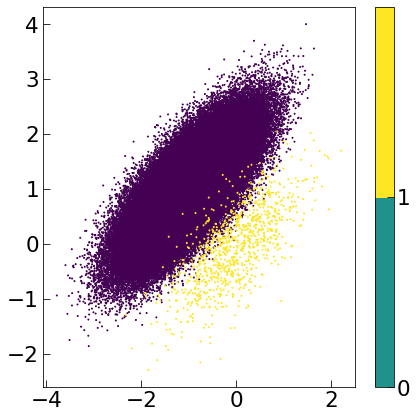

In [61]:
plt.scatter(X[:,0], X[:,1], c = y, s= 1)
plt.colorbar(ticks = [0, 1], boundaries = [0,1,2])

Now let's build a model and see how good the model is  at distinguishing between class = 1 (yellow points) and class = 0 (blue points).
First we divide the datapoints between a train and a test set.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)

In [0]:
logmodel = LogisticRegression()

In [0]:
logmodel.fit(X_train, y_train)

In [0]:
y_pred = logmodel.predict(X_test)

In [78]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[39963,    13],
       [   47,   177]])

In [0]:
# Function for plotting the confusion matrix, 
#taken from 
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, origin = 'lower')
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[39963    13]
 [   47   177]]


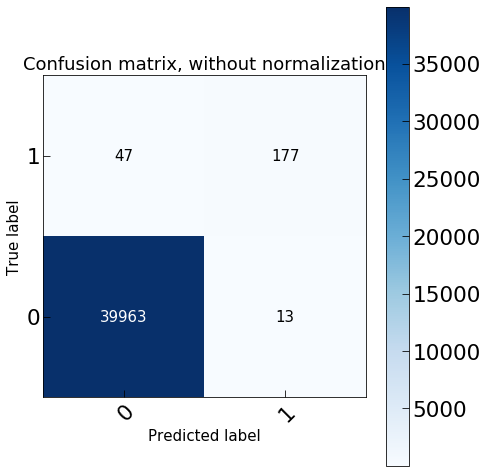

In [80]:
plot_confusion_matrix(y_test.astype(int), y_pred.astype(int), classes = [0,1], normalize = False)

#Confusion matrix:

Confusion matrix allows us to gain intuition about how well the model performs at distinguishing between the two classes. 

In the example above we notice that out of all the test examples with label = 0, *39992* are classified by the model as belonging to Class 0 and *11* are claasified as Class 1.

On the other hand, out of all the test examples that belong to Class 1, *34* are falsely classified as Class 0, while *163* examples are correctly classified as Class 1.

# True Positive, False Positive, True Negative, False Negative

Now consider the following toy example. In the example above let us imagine that the features $X \in R^2$ represent a set of medical lab tests, and we want to predict whether a given person has a certain desease or not. 

We choose a convention according to which, class 1 contains the examples that have this desease and class 2 contains the examples with no desease. 

$C_0 :$ without desease, $C_1:$ with desease.

Since this **imaginary** desease is rare, the number of examples that fall into $C_0$ are much higher than the ones falling into $C_1$. 

Our goal is to build a model that is able to detect these desease. In other words, we want to build a model that can ideally predict all the examples that belong to the class $C_1$.

##Positive examples:
examples that belong to $C_1$.

##Negative examples:
examples that belong to $C_0$.

##True positives:
examples that belong to $C_1$ and are correctly classified as $C_1$

##False positive:
examples that belong to $C_0$ but are incorrectly classified as $C_1$

##True negative:
examples that belong to $C_0$ and are correctly classified as $C_0$

##False negative:
examples that belong to $C_1$ but are incorrectly classified as $C_0$.


In the example above, we have:

$\begin{bmatrix}
FN & TP \\
TN & FP
\end{bmatrix} = \begin{bmatrix}
 34 & 136 \\
39992 & 11
\end{bmatrix}$

##True Positive Rate, recall, completeness, sensitivity:

$TPR = \frac{TP}{TP+FN}$ 

It is a measure of the fraction of objects detected by the classifier. 

##Precision, efficiency

$\mathrm {Precision} = \frac{TP}{TP + FP}$

##Contamination = 1 - Precision = Type I error

$\mathrm{Contamination} = \frac{FP}{TP + FP}$

This is a measure of the fraction of detected objects that are misclassified. 

##False Negative Rate = type II error= 1 - True Positive rate:

$FNR = \frac{FN}{TP + FN} = 1- TPR$

##Accuracy

$\mathrm{Accuracy} = \frac{TP + FN}{P+N} = \frac{TP+FN}{TP+FN+TN+FP}$

##Which one should I use for my problem?

Depending on the problem, we may want to optimize one or a combination of the above measures.

It is often common to aim for optimizing the Completeness and Precision at the same time, or alternatively one may wish to optimize the accuracy. 

##Why Accuracy may not be a good meausre for a problem
It is importnt to emphasize that in some problems we may not wish to optimize the accuracy. 

Consider the desease discovery example again. Let's imagine a model that always predict $C_0$. Since the majority of the examples are in the $C_0$ class, this model is going to achieve a reasonable accuracy. Let's look at the following code: 

In [0]:
class Dummy_model:

  def predict(self, xt):
    '''
    returns the prediction of 
    the dummy model, the answer is
    always 0
    '''  
    return np.zeros(xt.shape[0], dtype = int)

  def accuracy(self, xt, yt):
    '''
    returns the accuracy of the model for 
    a set of examples xt and labels yt
    '''
    return len(yt[yt==0])*1./len(yt)

  def predict_proba(self, xt):
    '''
    returns: (Nx2) dimensional array, 
    where N is the length of xt.
    Each row contains two entries: the p(C0|x) & p(C2|x)
    '''  
    probs = np.zeros_like(xt)
    probs[:,0] = 1.

    return probs


class Random_model():
  
  def predict(self, xt):
    '''
    returns the prediction of 
    the dummy model, the answer is
    always 0
    '''  
    np.random.seed(12345)
    sample_size = xt.shape[0]
    one_pred = np.random.choice(sample_size , int(.5 * sample_size ), replace = False)
    preds = np.zeros(sample_size, dtype = int)
    preds[one_pred] = 1

    return preds

  def predict_proba(self, xt):
    '''
    returns: (Nx2) dimensional array, 
    where N is the length of xt.
    Each row contains two entries: the p(C0|x) & p(C2|x)
    '''  
    probs = .5 + np.zeros_like(xt)

    return probs  


In [132]:
dummy_model = Dummy_model()
ydummy_predict = dummy_model.predict(X_test)
print("Accuracy of the model =","%.3f" % dummy_model.accuracy(X_test, y_test))

random_model = Random_model()
yrandom_predict = random_model.predict(X_test)

Accuracy of the model = 0.994


As you can see this dummy model that labels all the examples as $C_0$, can achieve a very high accuracy of 99.5% which is very misleading. 

Now let's plot the confusion matrix.

Confusion matrix, without normalization
[[39976     0]
 [  224     0]]


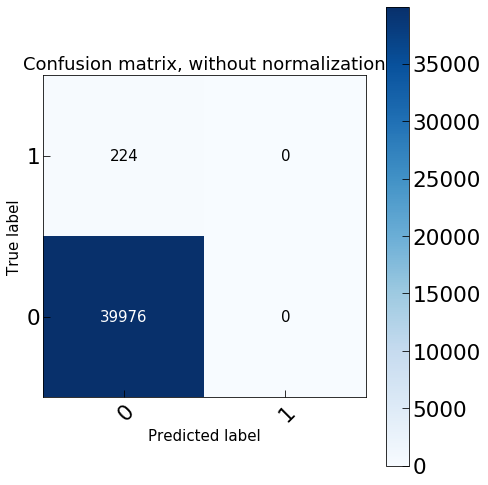

In [143]:
plot_confusion_matrix(y_test, ydummy_predict, classes = [0,1], normalize = False)

As clear from the confusion matrix, the TPR or completeness is ***zero*** as this model rejects all the examples and labels them as non-desease. 

#ROC curve

The prediction of a classifer depends on a decision threshold:

$\hat{y} = 1$ if $P(C_1|x) > $ threshold

Normally, threshold is set to 0.5; but by changing the threshold, we can change the TPR and the FPR.

```
# This is formatted as code
```



Text(0.5, 1.0, 'ROC curve')

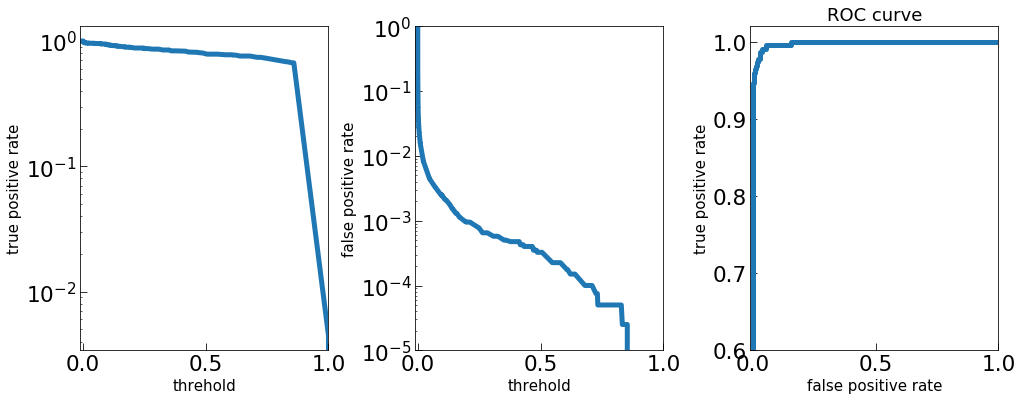

In [181]:
y_probs = logmodel.predict_proba(X_test)
y_positive_prob = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_positive_prob)

fig, ax  = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.35)

ax[0].plot(thresholds, tpr, lw = 5)
ax[0].set_yscale('log')
ax[0].set_xlim(-0.01,1)
ax[0].set_xlabel('threhold')
ax[0].set_ylabel('true positive rate')

ax[1].plot(thresholds, fpr, lw = 5)
ax[1].set_yscale('log')
ax[1].set_xlim(-0.01,1)
ax[1].set_ylim(0.00001,1)
ax[1].set_xlabel('threhold')
ax[1].set_ylabel('false positive rate')

ax[2].plot(fpr, tpr, lw = 5)
ax[2].set_ylim(0.6,1.02)
ax[2].set_xlim(-0.01,1)
ax[2].set_xlabel('false positive rate')
ax[2].set_ylabel('true positive rate')
ax[2].set_title("ROC curve")


## ROC curve continued!

As we see in the above figure, increasing the threshold will decrease the TPR and will decrease the FPR. 

We wish to pick a model that has a high TPR (a complete model) and a low FPR (low contamination).

For a model that randomly assigns labels to the examples, TPR = FPR regardless of the threshold. Therefore, the ROC curve of a random model is simply a straight line connecting $(0,0)$ to $(1,1)$.



Text(0, 0.5, 'true positive rate (recall)')

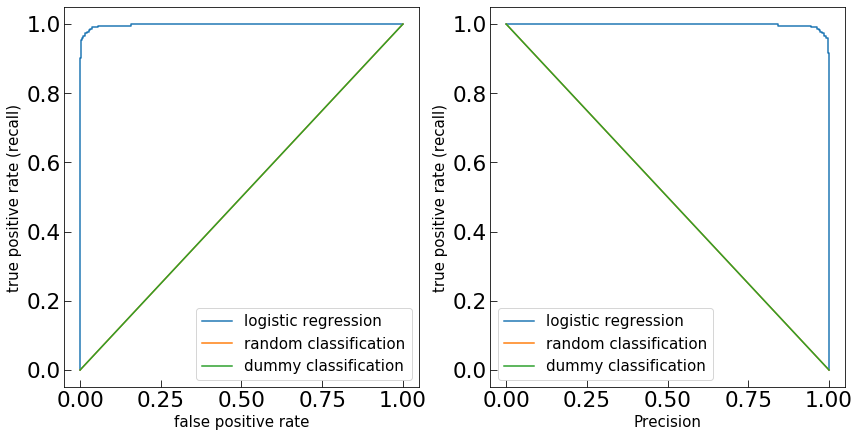

In [180]:
# let's compute the probabilities prob(C1|x_test) 
#for the three models 

random_model, dummy_model = Random_model(), Dummy_model()
model_keys = {"logistic regression" : logmodel,
              "random classification" : random_model, 
              "dummy classification": dummy_model}
model_probs = {}
for (key, values) in model_keys.items():

  probs = values.predict_proba(X_test)
  model_probs[key] = probs[:, 1]



# let's plot the ROC curve for the three models

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for (name, y_prob) in model_probs.items():

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])
    prec = 1. - fpr
    ax1.plot(fpr, tpr, label=name)
    ax2.plot(prec, tpr, label = name)
ax1.legend(loc='best')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate (recall)')

ax2.legend(loc='best')
ax2.set_xlabel('Precision')
ax2.set_ylabel('true positive rate (recall)')

